# `Visualizing Earnings Based on College Majors`
---
---

**In this project, we'll be working with `recent-grads.csv`, a dataset on the job outcomes of students who graduated from college between 2010 and 2012.** The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github [repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Each row in the dataset represents a different major in college and contains information on gender diversity, 

Headers for `recent-grads.csv` are shown below:

|**Header**|**Description**|
|-|-|
|Rank| Rank by median earnings **(the dataset is ordered by this column)**|
|Major_code| Major code, FO1DP in ACS PUMS|
|Major|	Major description|
|Major_category|Category of major from Carnevale et al|
|Total|	Total number of people with major|
|Sample_size|	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|	Male graduates|
|Women|	Female graduates|
|ShareWomen|	Women as share of total|
|Employed|	Number employed (ESR == 1 or 2)|
|Full_time|	Employed 35 hours or more|
|Part_time|	Employed less than 35 hours|
|Full_time_year_round|	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed|	Number unemployed (ESR == 3)|
|Unemployment_rate|	Unemployed / (Unemployed + Employed)|
|Median|	Median earnings of full-time, year-round workers|
|P25th|	25th percentile of earnings|
|P75th|	75th percentile of earnings|
|College_jobs|	Number with job requiring a college degree|
|Non_college_jobs|	Number with job not requiring a college degree|
|Low_wage_jobs|	Number in low-wage service jobs|


Using visualizations, we can start to explore interesting questions, such as:

- Do students in more popular majors make more money?Using scatter plots

- How many majors are predominantly male? Predominantly female? Using histograms

- Which category of majors have the most students? Using bar plots

- AND MANY MORE!

Before we start creating data visualizations, let's import the libraries we need, explore the dataset, and remove rows containing null values.

  # `Setting Up The Environment`
  ---
  **Importing libraries, controlling figure aesthetics & run the Jupyter magic:** `%matplotlib inline`

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
#controlling figure aesthetics: set font size, color palette, and style using seaborn
sns.set(font_scale=1.3)
sns.set_palette("PiYG")
sns.set_style("white")

In [3]:
#running some magic ;D
%matplotlib inline
#supernecessary --> so that Jupyter display all the plots inline.

# `Reading & Exploring`
---
**Read the dataset into a DataFrame and start exploring the data.**

In [4]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[:1] #return the first row formatted as a table.

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [6]:
recent_grads.head() 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.tail() 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Just a quick note here. As mentioned in the introduction, the dataset is ordered by Rank (rank by median earnings)
<br> So we can see that ...
- Majors in top 5 highest median earnings are in the engineering category
- Majors in the bottom 5 lowest median earnings are in the biology & life science, psychology & social work, and education categories

Well... I'm not surprised... let's move on

In [8]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


# `Cleaning: Dropping Rows With Missing Values`
---
**We need to drop rows with missing values, because Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.**

In [9]:
raw_data_count = len(recent_grads.index)
raw_data_count

173

In [10]:
#drop rows containing missing values
recent_grads = recent_grads.dropna()

In [11]:
#check the number of rows of the cleaned DataFrame
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

In [12]:
#comparing
print('raw_data_count: ' + str(raw_data_count) + ' | ' + 'cleaned_data_count: '+ str(cleaned_data_count))

raw_data_count: 173 | cleaned_data_count: 172


**As we can see from the comparison result above, the initial DataFrame has 1 row with missing values, and we managed to drop it. 
<br>Now we are ready to create some amazing plots! Let's get it!**

# `Scatterplot: Exploring The Relationship Between Some Columns`
---
**Using `sns.scatterplot()`**

**Let's generate scatter plots to explore the following relations:**
- `Sample_size and Median`
- `Sample_size and Unemployment_rate`
- `Full_time and Median`
- `ShareWomen and Unemployment_rate`
- `Men and Median`
- `Women and Median`

**And then, let's  answer the following questions:**
- `Do students in more popular majors make more money?`
- `Do students that majored in subjects that were majority female make more money?`
- `Is there any link between the number of full-time employees and median salary?`

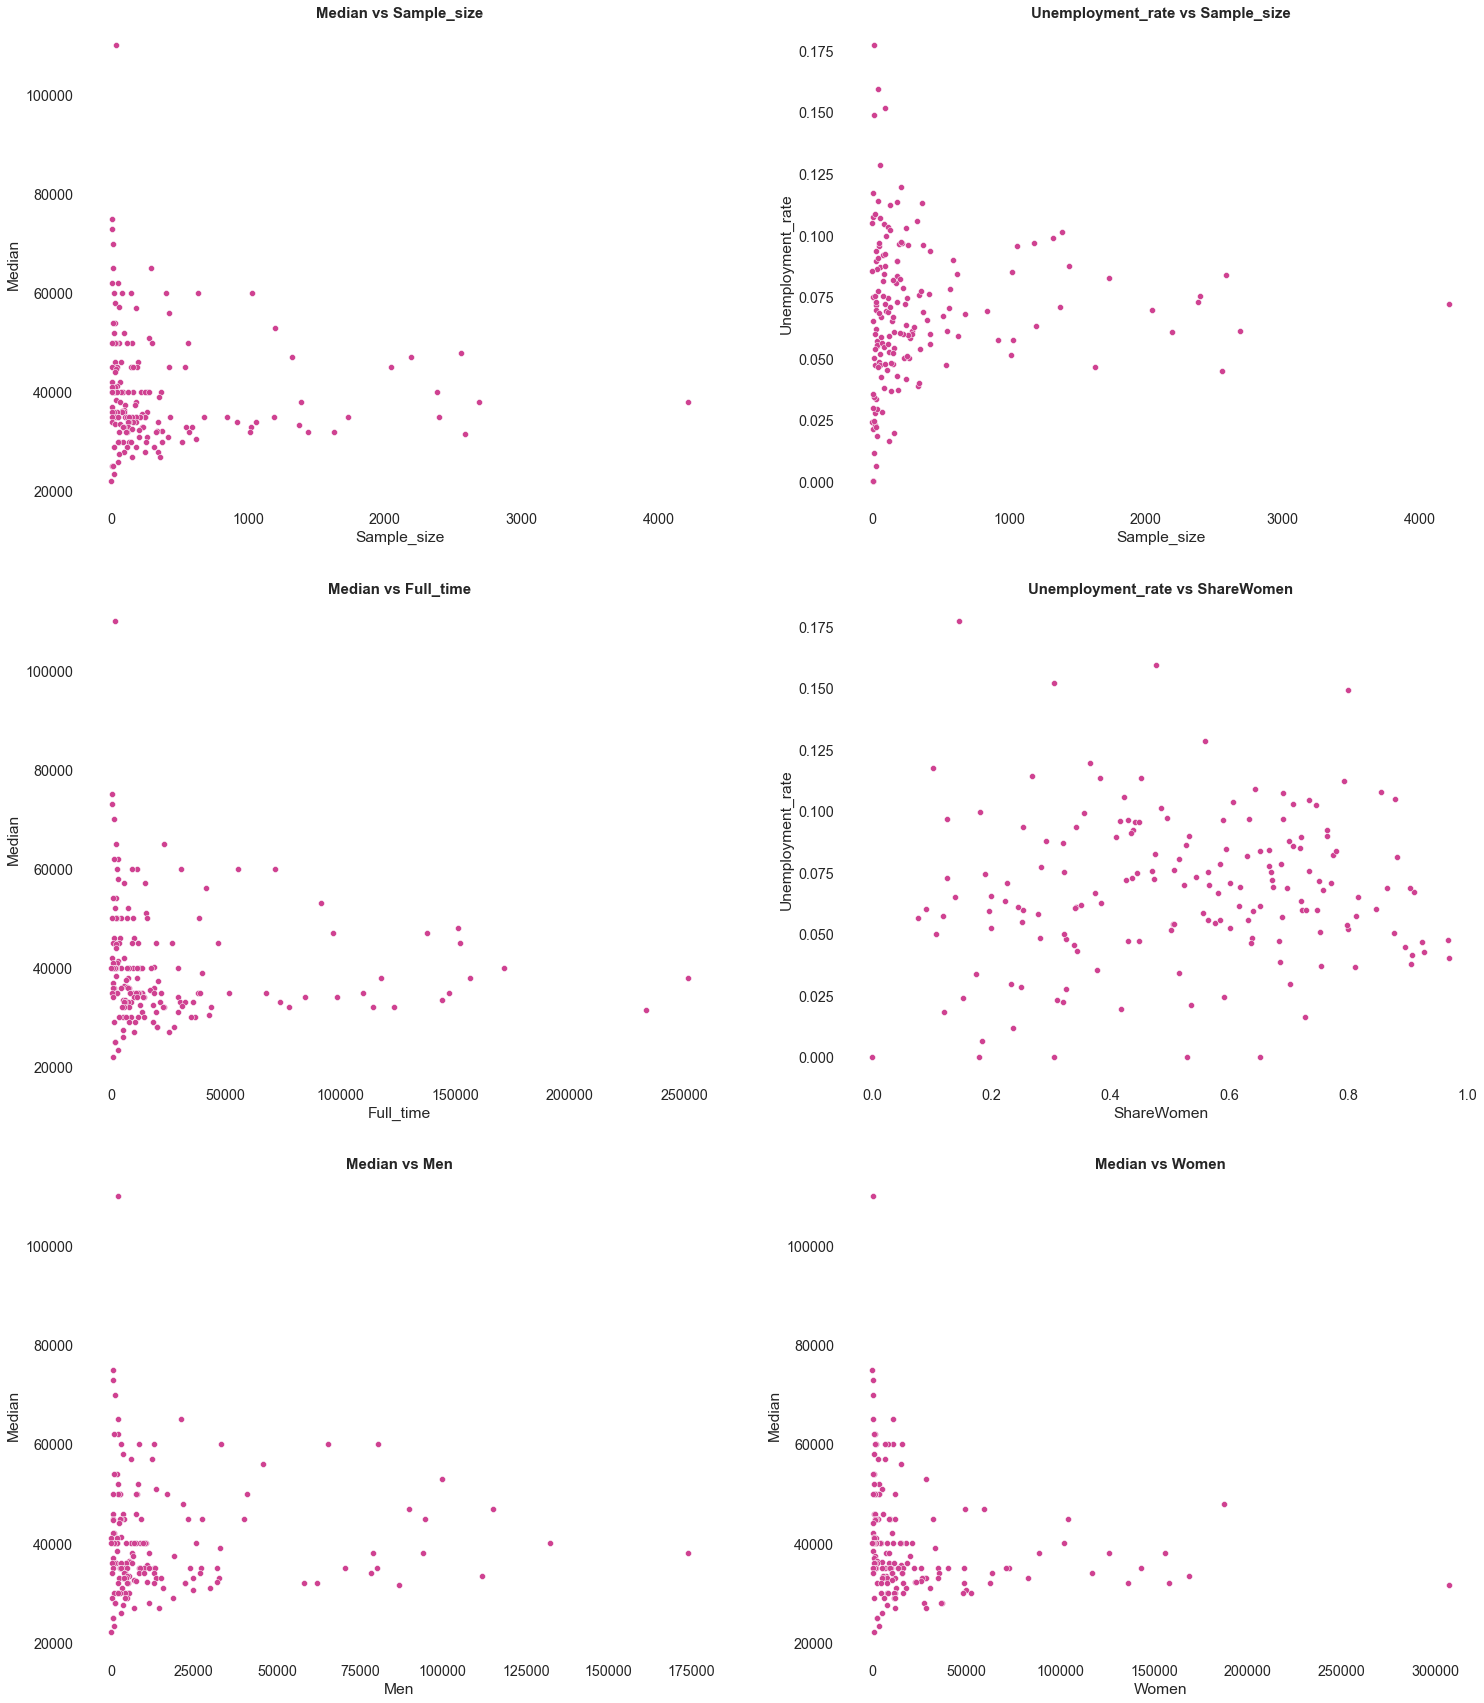

In [13]:
#Generate scatterplots in one go using a for loop

x_val = ['Sample_size','Sample_size', 'Full_time', 'ShareWomen', 'Men', 'Women']
y_val = ['Median','Unemployment_rate', 'Median', 'Unemployment_rate', 'Median', 'Median']

fig = plt.figure(figsize=(25, 30))
for sp in range (len(x_val)):
    ax = fig.add_subplot(3,2,sp+1)
    ax = sns.scatterplot(data = recent_grads, x= x_val[sp], y= y_val[sp])
    plt.title(y_val[sp] + ' vs ' + x_val[sp], weight='bold').set_fontsize('15')
    sns.despine(left=True, bottom=True)
plt.show()

Based on the plot above, we can see that **all of the plots suggest that there is no significant relationship between the x & y variables:**

- **On all the plots except for 'Unemployment_rate vs ShareWomen'**,  we can see that there is a high variance near the 0 points, but as the y-value increases the variance diminishes.

- **On 'Unemployment_rate vs ShareWomen'**, we can see that the dots are arbitrarily spread out. We can say the variances are pretty much equal at all ranges, which suggest that none of the variables have any effect on each other.

## Remember that we have 3 questions?

So, using the `Median vs Full_time` plot that we have above, we managed to answer one of the questions, 

## Q1: "Is there any link between the number of full-time employees and median salary?", 
**`Full_time: Number employed 35 hours or more
Median: Median salary of full-time, year-round workers.`**

<br>**and the answer to the question is no. There is no link between the two** 
<br>* *since we know that on all plots there is no significant relationship between the x & y variable (see the plot for detail)* 

<br>

So... ONE down! TWO to go! **We stil have two unanswered questions, which are:**
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?

So let's make a few more plots to find the answers

## Q2: "Do students in more popular majors make more money?"
**`Total :Total number of people with major.
Median :Median salary of full-time, year-round workers.`**

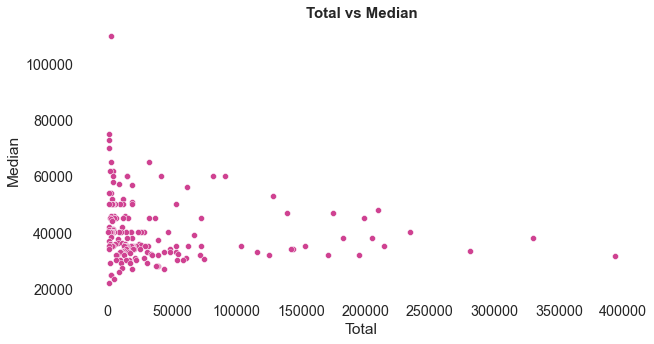

In [14]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='Total', y='Median')
sns.despine(left=True, bottom=True)
plt.title('Total vs Median', weight='bold').set_fontsize('15')
plt.show()

**Based on the plot, the answer is no. There is no correlation between Median and Total. 
<br>We can see that there is a high variance near the 0 points, but as Total increases the variance diminishes.**

**In other words, there is no correlation between the popularity of the major, and money**

## Q3: "Do students that majored in subjects that were majority female make more money?"
**`ShareWomen: Women as share of total.
Median: Median salary of full-time, year-round workers.`**

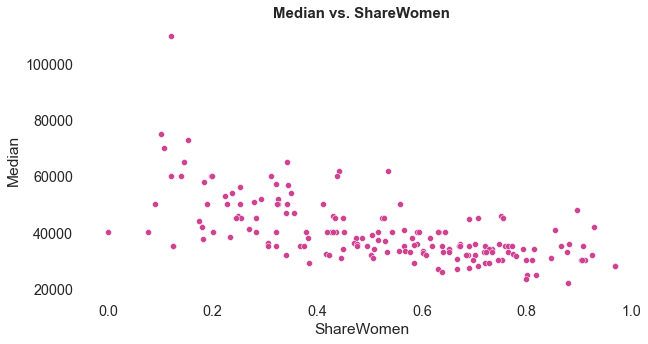

In [15]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='ShareWomen', y='Median')
sns.despine(left=True, bottom=True)
plt.title('Median vs. ShareWomen', weight='bold').set_fontsize('15')
plt.show()

**Based on the plot, there is a weak negative correlation between Median and ShareWomen.
We can see that as Sharewomen increases, the Median decreases.**

**In other words, the students that majored in subjects that were female majority tend to make less money.**

**But really? Hmm we need more evidence. Let's analyze!**

**We need numbers!**

## Q3 analysis: Deep diving on Median and ShareWomen

In [16]:
#Analyze ShareWomen and Median using groupby()

median_sharewomen = recent_grads.groupby(["ShareWomen"])["Median"].mean().sort_values(ascending=False)
print(median_sharewomen)

ShareWomen
0.120564    110000
0.101852     75000
0.153037     73000
0.107313     70000
0.144967     65000
             ...  
0.637293     26000
0.799859     25000
0.817099     25000
0.798746     23400
0.877960     22000
Name: Median, Length: 172, dtype: int64


**Alright, so the result suggest that ShareWomen with low values tend to get higher median earnings, and vice versa. 
<br>However, to be more confident in our analysis , let's group ShareWomen into 3 bins, and see what is the average Median of each group.** 

**Are we still getting a negative correlation? let's find out**

In [17]:
#splitting ShareWomen into 3 groups
sharewomen_grouped = recent_grads["ShareWomen"].value_counts(bins = 3).sort_index(ascending= False)
sharewomen_grouped

(0.646, 0.969]                     60
(0.323, 0.646]                     71
(-0.0019690000000000003, 0.323]    41
Name: ShareWomen, dtype: int64

ShareWomen
(-0.00197, 0.323]    50846.341463
(0.323, 0.646]       39695.774648
(0.646, 0.969]       33168.333333
Name: Median, dtype: float64


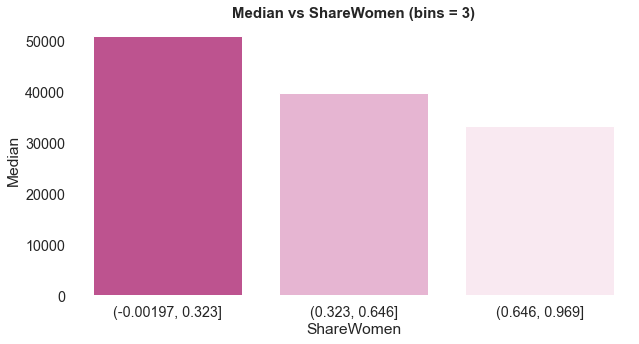

In [18]:
#using sns.barplot
#we are creating a barplot with 3 bins

bins = [-0.0019690000000000003, 0.323, 0.646, 0.969] #using the bins from the previous result

median_sharewomen_grouped = recent_grads.groupby(pd.cut(recent_grads["ShareWomen"], 
                                                        bins))["Median"].mean().sort_values(ascending= False)
print(median_sharewomen_grouped)
fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('ShareWomen')
plt.ylabel('Median')
sns.barplot(x=sorted(median_sharewomen_grouped.index), y=median_sharewomen_grouped, data=recent_grads, ci=None)
plt.title('Median vs ShareWomen (bins = 3)', weight='bold').set_fontsize('15')
sns.despine(left=True, bottom=True)

**It's true! the students that majored in subjects that were female majority on average make less money.**

**So... just to recap:**

- **"Do students in more popular majors make more money?"**
<br>Answer: No. There is correlation between the popularity of the major, and money
- **"Do students that majored in subjects that were majority female make more money?"**
<br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
- **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other

**We have managed to answer these questions by creating scatterplots for:**
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median
- Total vs Median
- Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)

**We're done with scatterplots, next we will create histograms!**

# `Histograms: Exploring The Distribution of Values In A Column`
---
Using **`sns.histplot`**
<br>**Let's generate histograms to explore the distributions of the following columns:** 
<br> * Note: We're going to use `Series.describe()` to understand the data distribution of each column
- `Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)`
- `Median: Median salary of full-time, year-round workers`
- `Employed: Number employed`
- `Full_time: Number employed 35 hours or more`
- `ShareWomen: Women as share of total`
- `Unemployment_rate: Percent of labor force that is jobless`
- `Men: Male graduates`
- `Women: Female graduates`

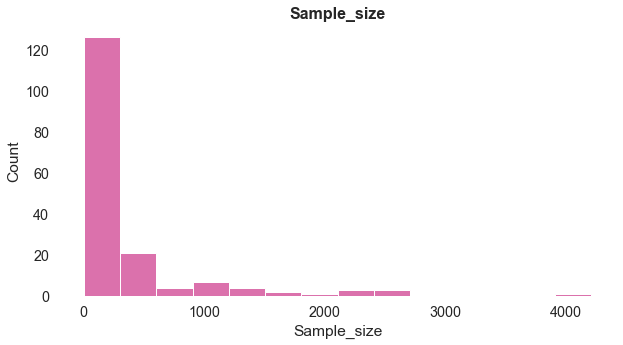

--------------------------------
count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64
--------------------------------


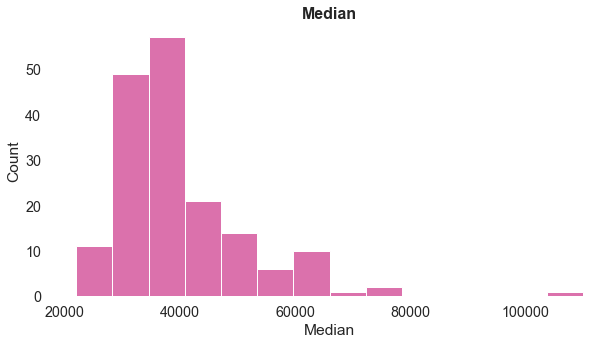

--------------------------------
count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64
--------------------------------


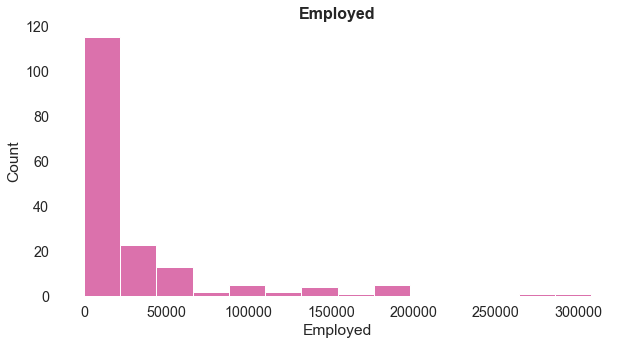

--------------------------------
count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64
--------------------------------


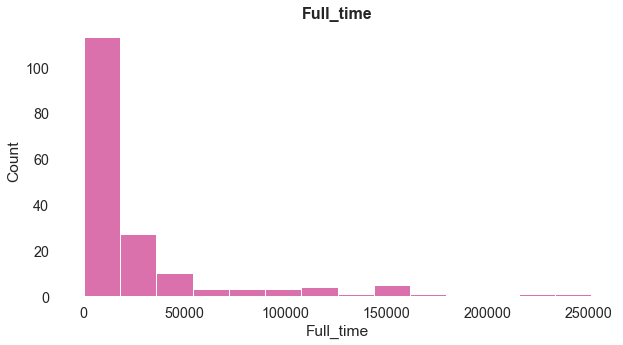

--------------------------------
count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64
--------------------------------


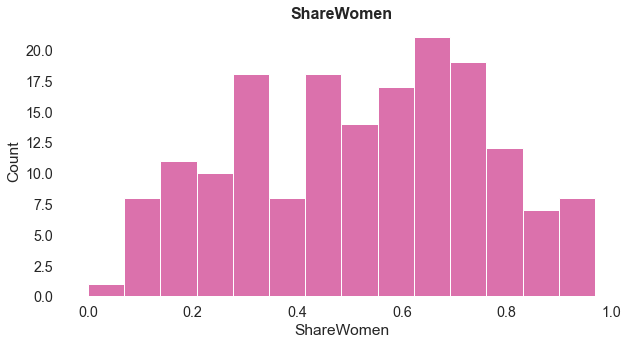

--------------------------------
count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64
--------------------------------


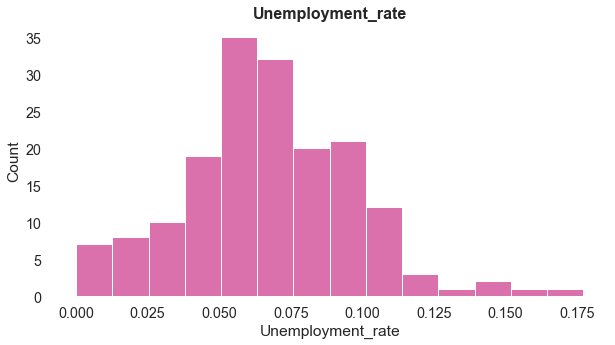

--------------------------------
count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64
--------------------------------


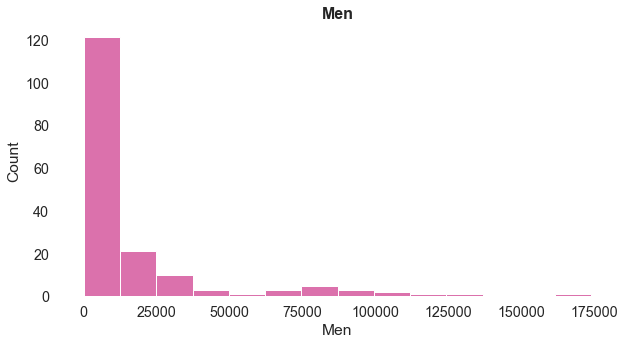

--------------------------------
count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64
--------------------------------


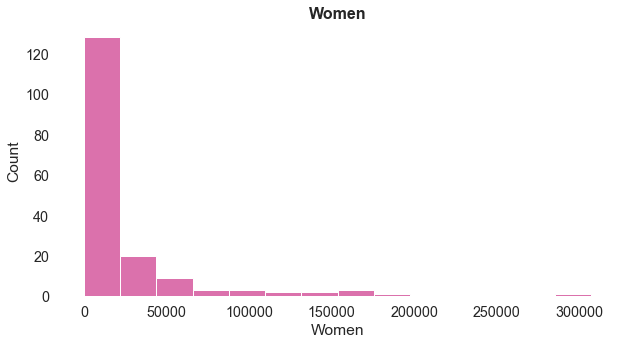

--------------------------------
count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64
--------------------------------


In [19]:
#Generate histograms in one go using a for loop
#we use 14 bins
#*bin size is determined by taking the squareroot of data points --> 172^(1/2) ~14

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

for sp in range (len(cols)):
    fig = plt.subplots(0,8, figsize =(10,5))
    sns.histplot(data = recent_grads, x= cols[sp],  bins = 14)
    sns.despine(left=True, bottom=True)
    plt.title(cols[sp], weight='bold').set_fontsize('16')
    plt.show()
    print('--------------------------------')
    print(recent_grads[cols[sp]].describe())
    print('--------------------------------')

**Cool, using histograms we are able to comfortably visualize the data distribution. But what are the takeaways?**
<br>\**Note: Obviously, histogram and series.describe() will display us slightly different numbers. What we are trying to achieve here is to demonstrate how we can easily visualize data distribution with decent accuracy using histogram.*

- Sample_size: 
    - Most values are within (0, 500) based on histogram
    - 75% values are within \[2, 339\] based on series.describe(&nbsp;)
    - Ie. The values of Sample_size on each major appears to be really low. If it is as low as I think it is, we can't get a highly accurate insights from this data. 
    - **(We are going to deep dive on this column later in the section)**
- Median: 
    - Most values are within (30000, 40000) based on histogram
    - 75% values are within \[22000, 45000\] based on series.describe(&nbsp;)
    - Ie. Students in most majors make around \\$30,000 - \\$40,000 annually.
- Employed: 
    - Most values are within (0, 25000) based on histogram
    - 75% values are within \[0, 31701\] based on series.describe(&nbsp;)
    - Ie. Most majors have a really low number of employment. But is it really?
    - **(We are going to deep dive on this column later in the section)**
- Full-time: 
    - Most values are within (0, 25000) based on histogram
    - 75% values are within \[111, 25447\] based on series.describe(&nbsp;)
    - Ie. Most graduates don't have a full-time job
    - Note that the histogram for full-time and employed looks similar, which is intuitively correct.
- ShareWomen: 
    - The values in this histogram is more evenly spread out compared to the others
    - Most values are within (.6, .7) based on histogram
    - Ie. Most majors have more females in proportion to male. I honestly thought it's the opposite...
        Female represent 60% - 70% total number of people per major
    - **(We are going to deep dive on this column later in the section)**
- Unemployment_rate: 
    - Most values are within (.05, .07) based on histogram
    - Common unemployment rates are between 5.5% - 6.25%
- Men: 
    - Most male garduates are within (0, 25000) based on histogram
    - 75% male graduates are within \[119, 14631\] based on series.describe(&nbsp;)
- Women: 
    - Most female graduates are within (0, 25000) based on histogram
    - 75% of female graduates are within \[0, 22553\] based on series.describe()
    - **Hold on, there is a major with 0 female graduates?** ( based on series.describe(&nbsp;) )
    - **(We are going to deep dive on this column later in the section)**

## Analysis: Deep diving on `Sample_size`, `Employed`, `ShareWomen`, and `Women`
**A few quirky things from histograms and series.describe(&nbsp;) caught my attention. Let's dive right into it.**

**`Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)`**

As previously mentioned, the sample size seem to be really low. 
<br>Let explore this column even more, and then find the percentage of sample size by calculating `Sample_size / Full_time_year_round`.

In [20]:
#exploring rows that have the most common sample size values --> Sample_size: (0, 500)

common_samplesize = recent_grads[recent_grads["Sample_size"].between(0, 500)]
common_samplesize.sort_values(by='Sample_size', ascending=False)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
97,98,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,62052.0,27015.0,35037.0,Physical Sciences,0.564639,427,46138,...,13133,28966,2727,0.055807,35000,24000,50000,17923,22039,5751
17,18,2400,GENERAL ENGINEERING,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,...,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192
42,43,2100,COMPUTER AND INFORMATION SYSTEMS,36698.0,27392.0,9306.0,Computers & Mathematics,0.253583,425,28459,...,4332,21130,2934,0.093460,45000,30000,60000,13344,11783,1672
146,147,6002,MUSIC,60633.0,29909.0,30724.0,Arts,0.506721,419,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
48,49,3607,PHARMACOLOGY,1762.0,515.0,1247.0,Biology & Life Science,0.707719,3,1144,...,532,565,107,0.085532,45000,40000,45000,603,478,93
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


Ok, there are a few things to note here:
- From the data dictionary, we know that `Sample_size` = Sample size (unweighted) of full-time, year-round ONLY (used for earnings). 
    - Ie. In `Sample_size` column we get the number of sampled data obtained from `Full_time_year_round`, which are used to determine earnings in `Median` column. 
    - **Or to put it simply, `Sample_size` column reflects the number of people from `Full_time_year_round` that reported their earnings.**
    

- The problem is, sample_size values are very low for the majority of the rows in this dataset. 
    - Based on the result of `recent_grads["Sample_size].describe()` (under the histogram in the above section), count = 172. 
    - Here, we can see that `common_samplesize` has 141 rows. This indicates that 141 / 172 = .82 = **82% of data has a sample size between (0, 500)**


- If we look at the last row in the sorted `common_samplesize` dataframe above (row #172), apparently **for "LIBRARY SCIENCE" major, out of 410 Full_time_year_round values, there are only 2 Sample_size values.**
    - `Sample_size / Full_time_year_round` = 2 / 410 = .004 = **.4%**
    
    
- I don't have an extensive statistical bacakground, but I'm pretty sure a .4%  sample size is too low to provide us any meaningful result 
    <br>*Based on this article [here](http://www.tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size,%2C%2010%25%20would%20be%2020%2C000.), a good sample size number is around 10%

*Alright alright alright* enough of this sample size rabbit hole! Let's just do this one thing:
**Calculate the sample size percentage of this dataset**

In [21]:
#just some math
sample_dataset = recent_grads["Sample_size"] / recent_grads["Full_time_year_round"]
sample_dataset.describe()

count    172.000000
mean       0.017747
std        0.004970
min        0.004162
25%        0.015208
50%        0.017751
75%        0.020870
max        0.036036
dtype: float64

So based on `sample_dataset.describe()`, we know the following:
- Average sample size used is 1.7%
- Minimum sample size used is .4% (we just calculated it earlier, it belongs to LIBRARY SCIENCE major)
- Maximum sample size used is 3.6%, meh -________-'

Ok, not sure what's going on with this dataset. **The sample size is SUPER LOW**. This might have an effect on the other columns, or at least the median column, or... whatever, let's just roll with it. \**shoulder shrug*\*
<br> **NEXT!**

**`Employed: Number employed`**

So earlier we figured that most majors have a really low number of employment, which is not surprising.
<br>However, what surprises me is that **there is a major that has 0 people employed**. I wonder which major(s). Let's see...

In [22]:
#checking major(s) with 0 people employed
recent_grads[recent_grads["Employed"] == 0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


... and the major is **"MILITARY TECHNOLOGIES"**, so only 1 major? Hmmm

BUT WAIT! Let's take another look at the `recent_grads[recent_grads["Employed"] == 0]` above. There are a few quirks:
- Employed = 0
- Unemployed = 0?
- Median = 40000??
- Non_college_jobs = 0???
- College_jobs = 0????
- Low_wage_jobs = 0?????
- *WHAAAAT??!!??!!*

\**gasping for breath*\*
<br>I don't know what just happened, but suddenly I got dragged into another rabbit hole, and stumbled upon [this](https://github.com/fivethirtyeight/data/issues/250)
<br>**TL;DR There is something peculiar about this dataset.**
- **Total !=  Employed + Unemployed**
- **Total != College_jobs + Non_college_jobs, + Low_wage_jobs**

So again, I am not sure what is going on here. But there is nothing we can do, so let's keep working with the dataset that we have. 

...Moving on...

**`ShareWomen: Women as share of total`**

We are going to answer one of the question that we have in the introduction, which is
<BR>**"How many majors are predominantly male?"**

In [23]:
#create a new column
recent_grads["gender_majority"] = np.nan 

#add values to the new column
recent_grads.loc[recent_grads["ShareWomen"] > .5, "gender_majority"] = "Female"
recent_grads.loc[recent_grads["ShareWomen"] < .5, "gender_majority"] = "Male"

#display
recent_grads 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,Male
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,Male
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,Male
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,Male
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,Female
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,Female
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,Female
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,Female


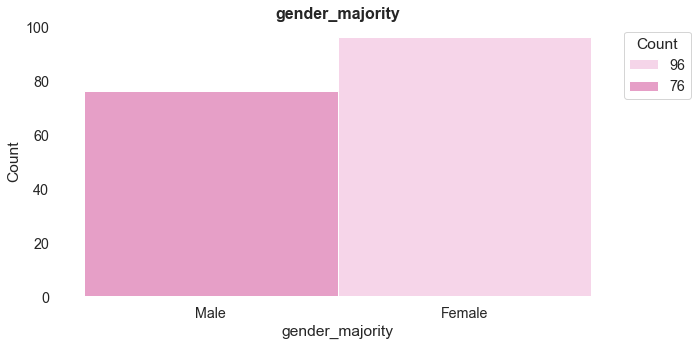

In [24]:
#using histplot
#we are creating a histogram to answer the question, "How many majors are predominantly male?"

fig = plt.subplots(0,8, figsize =(10,5))

#differentiate color b/w gender_majority using hue
sns.histplot(data = recent_grads, x= "gender_majority", hue = "gender_majority") 
sns.despine(left=True, bottom=True)
plt.title("gender_majority", weight='bold').set_fontsize('16')

#display #count on legend
plt.legend(recent_grads["gender_majority"].value_counts(),bbox_to_anchor=(1, 1), title= 'Count') 
plt.show()

**As we can see, 96 majors are predominantly Female, and 76 majors are predominantly Male. Cool...**

**`Women: Female graduates`**

Based on series.describe(&nbsp;) **there is a major with 0 female graduates, I wonder what that is...**

In [25]:
recent_grads[recent_grads["Women"] == 0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,111,0,0.0,40000,40000,40000,0,0,0,Male


Ahh.. this one again, **"MILITARY TECHNOLOGIES"**...

We just had this one earlier when deep diving on `Employed`. I don't know, this major has weird numbers. 
<br>**We'll just leave it at that. Next please!**

**And of course, before we move on, let's do a little recap:**

**In the last 2 sections, we created the following:**
1. **Scatter plots** to visualize potential relationships between the following columns:
    - Sample_size and Median
    - Sample_size and Unemployment_rate
    - Full_time and Median
    - ShareWomen and Unemployment_rate
    - Men and Median
    - Women and Median
    - Total vs Median
    - Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
    
 Based on our scatter plots, we find that:
    - **"Do students in more popular majors make more money?"**
    <br>Answer: No. There is correlation between the popularity of the major, and money.
    - **"Do students that majored in subjects that were majority female make more money?"**
    <br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money. 
    <br>(we deep dived on this by creating a bar plot with 3 bins)
    - **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other


2. **Histograms** to visualize the distributions of the following columns: 
    <br>Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women 
  
  We also did further analysis on Sample_size, Employed, ShareWomen, and Women
      - We answered the question, **"How many majors are predominantly male?"** by creating a bar plot when deep diving on ShareWomen
      
**Ready for more? ;D**

# `Scatter Matrix (Pair Plot) : Exploring Potential Relationships And Distributions Simultaneously`
---
<br>**In this section, we will create a scatter matrix (pair plot), which is a plot that combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.** 
<br>\* *Note: A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.*

**Using `sns.pairplot()`**
<br>**Let's generate scatter matrix plots (pair plots) to explore the relationship and distubution of the following columns:**
- `Sample_size and Median`
- `Sample_size, Median, and Unemployment_rate`

Then, we will try to create a few more plots to explore the answer to the following questions:
- `Do students in more popular majors make more money?`
- `Do students that majored in subjects that were majority female make more money?`
- `Is there any link between the number of full-time employees and median salary?`

*Note: We did have answered these questions using scatter plots in the earlier section, but let's try to explore these questions again while we familarize ourselves with scatter matrix


**`Sample_size: Sample size (unweighted) of full-time
Median: Median salary of full-time, year-round workers
Unemployment_rate: Percent of labor force that is jobless`**

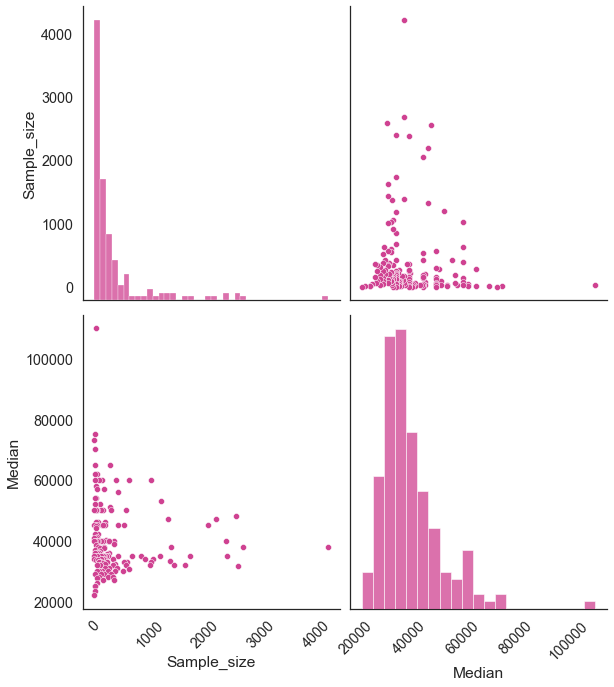

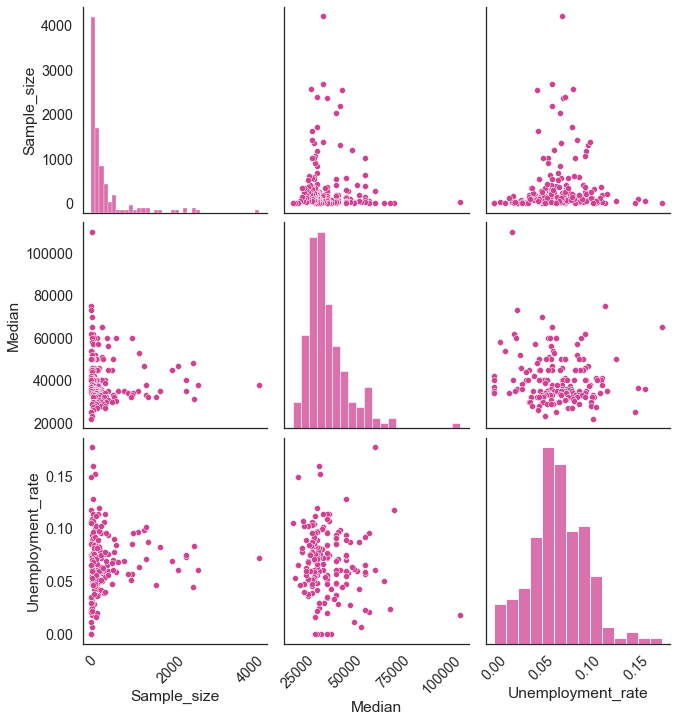

In [26]:
pairs = [['Sample_size', 'Median'], ['Sample_size', 'Median', 'Unemployment_rate']]

for pair in range(len(pairs)):
    pairplot = sns.pairplot(recent_grads[pairs[pair]])
    pairplot.fig.set_size_inches(10,10)
    for ax in pairplot.axes.flat: #rotate x-axis labels
        ax.tick_params("x", labelrotation=45)

**As we can see, there is no correlation between sample size, median, and enemployment rate.**
<br>*these scatter matrices confirmed our findings in the previous sections.

**Now, let's use scatter matrix to validate our answers to the three questions that we have**

To do that, we are going to create 3 scatter matrices (pair plots):
1. Total and Median
2. ShareWomen and Median
3. Full_time and Median

**`Total :Total number of people with major.
Full_time: Number employed 35 hours or more
ShareWomen: Women as share of total.
Median :Median salary of full-time, year-round workers.`**

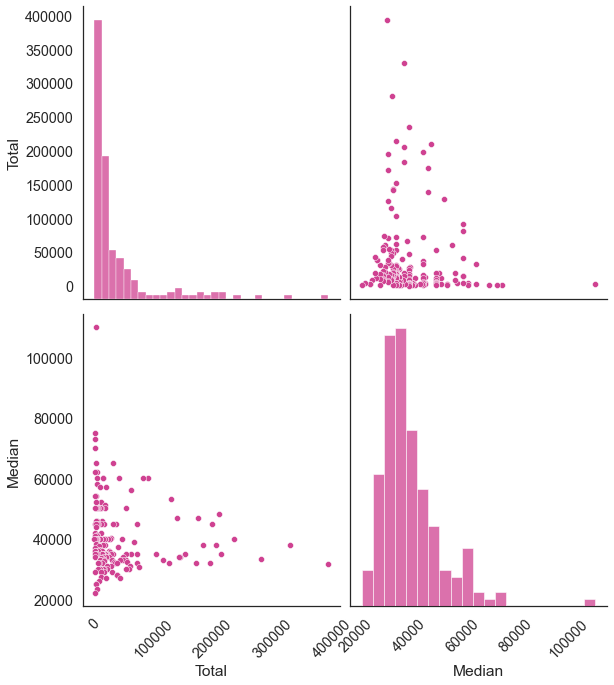

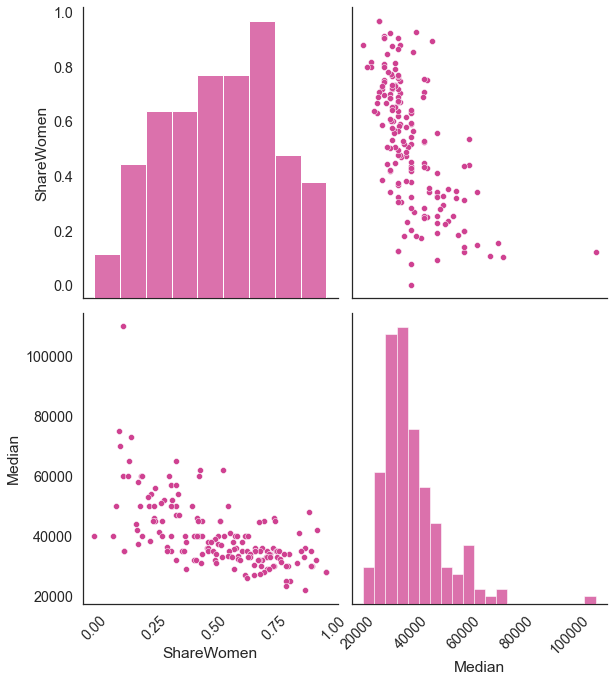

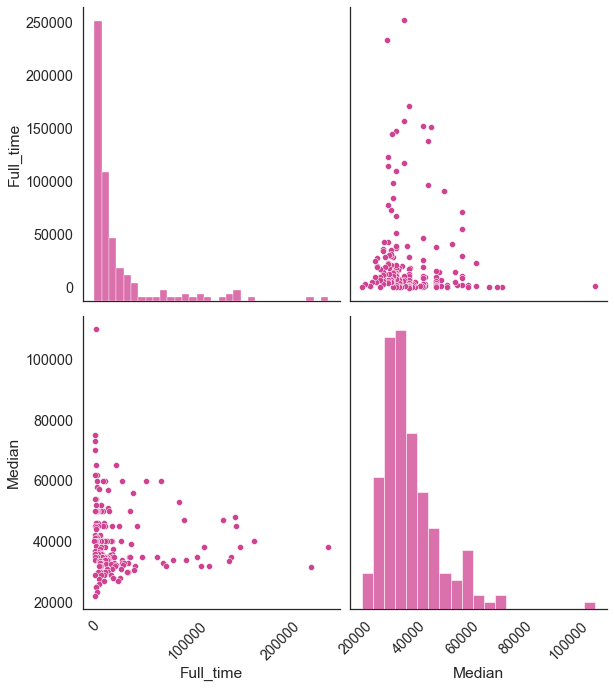

In [27]:
pairs = [['Total', 'Median'], ['ShareWomen', 'Median'], ['Full_time', 'Median']]

for pair in range(len(pairs)):
    pairplot = sns.pairplot(recent_grads[pairs[pair]])
    pairplot.fig.set_size_inches(10,10)
    for ax in pairplot.axes.flat: #rotate x-axis labels
        ax.tick_params("x", labelrotation=45)

**Alright cool! Scatter matrix and scatter plot give us the same answer. This help us validate our answer in the previous sections.**

**And uh, actually, we are done with scatter matrix. So Let's do another reflection...**

**In the last 3 sections, we created the following:**
1. **Scatter plots** to visualize potential relationships between the following columns:
    - Sample_size and Median
    - Sample_size and Unemployment_rate
    - Full_time and Median
    - ShareWomen and Unemployment_rate
    - Men and Median
    - Women and Median
    - Total vs Median
    - Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
    
 Based on our scatter plots, we find that:
    - **"Do students in more popular majors make more money?"**
    <br>Answer: No. There is correlation between the popularity of the major, and money.
    - **"Do students that majored in subjects that were majority female make more money?"**
    <br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money. 
    <br>(we deep dived on this by creating a bar plot with 3 bins)
    - **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other


2. **Histograms** to visualize the distributions of the following columns: 
    <br>Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women 
    
    We also did further analysis on Sample_size, Employed, ShareWomen, and Women
      - We answered the question, **"How many majors are predominantly male?"** by creating a bar plot when deep diving on ShareWomen
      
      
3. **Scatter matrix** plots to visually explore potential relationships and distributions of the following:
    - Sample_size and Median
    - Sample_size, Median, and Unemployment_rate
    - Total and Median
    - ShareWomen and Median
    - Full_time and Median
    
   Using scatter matrix plots, we managed to validate our answers in the previous sections.
    

**Next!**

# `Bar Plots: Comparing Some Columns`
---
**Using `sns.barplot`**
<br>**Let's generate barplots to do the following:**
- Compare the percentages of women (ShareWomen) from the first ten rows and last ten rows 
<br>of the recent_grads dataframe, while having major on the x-axis.
- Compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows 
<br>of the recent_grads dataframe, while having major on the x-axis.


**`ShareWomen vs Major`** 

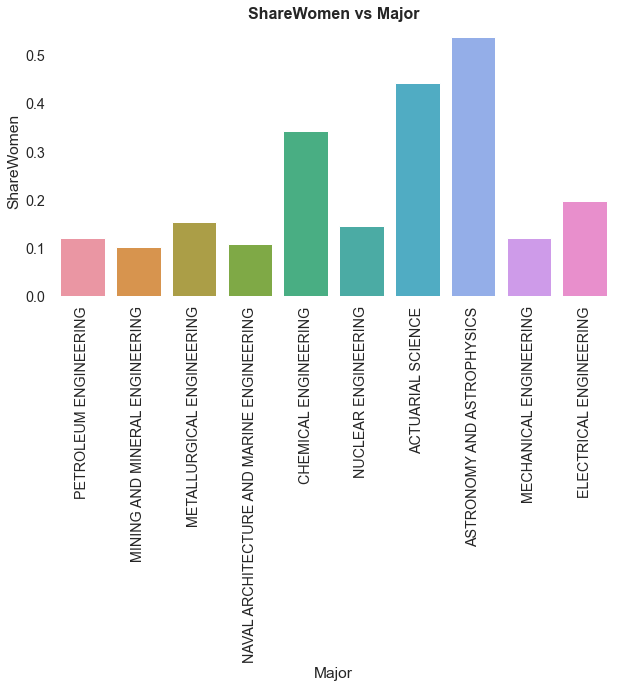

In [28]:
fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('Major')
plt.ylabel('ShareWomen')
sns.barplot(x=recent_grads[:10]['Major'], y=recent_grads[:10]['ShareWomen'], ci=None)
ax.set_xticklabels(recent_grads[:10]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)
plt.title("ShareWomen vs Major", weight='bold').set_fontsize('16')

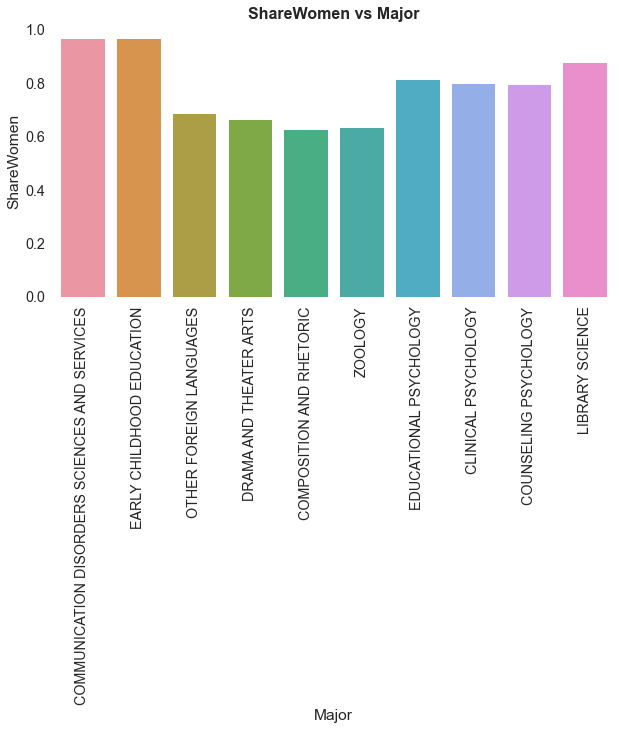

In [29]:
fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('Major')
plt.ylabel('ShareWomen')
sns.barplot(x=recent_grads[-10:]['Major'], y=recent_grads[-10:]['ShareWomen'], ci=None)
ax.set_xticklabels(recent_grads[-10:]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)
plt.title("ShareWomen vs Major", weight='bold').set_fontsize('16')

**Remember that this dataset is ordered by median earnings?** 

- It's interesting to see that **only 1 out of 10 majors with the highest median earnings are predominantly female (ASTRONOMY AND ASTROPHYSICS).** 
- On the other hand, the **10 majors with the lowest median earnings are all predominantly female.** Again, very interesting.
- This result also validates our findings in the earlier section, that there is a **negative correlation between ShareWomen and Median.**

**`Unemployment_rate vs Major`** 

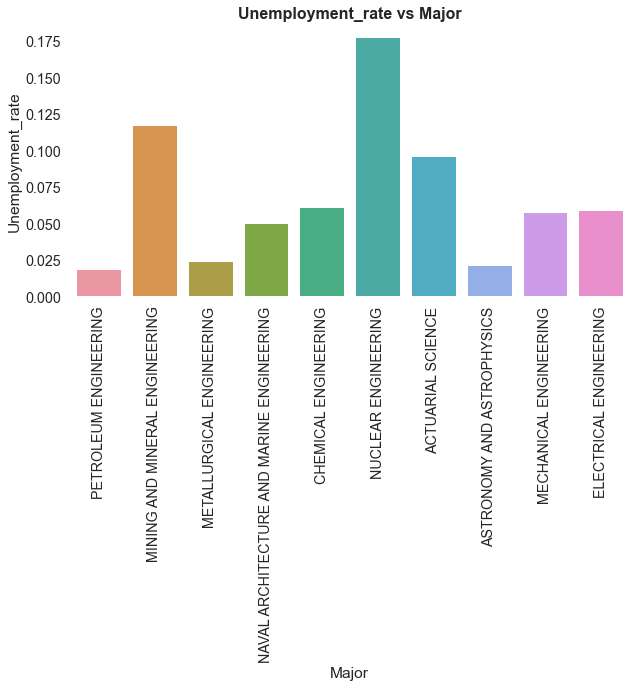

In [30]:
fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('Major')
plt.ylabel('Unemployment_rate')
sns.barplot(x=recent_grads[:10]['Major'], y=recent_grads[:10]['Unemployment_rate'], ci=None)
ax.set_xticklabels(recent_grads[:10]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)
plt.title("Unemployment_rate vs Major", weight='bold').set_fontsize('16')

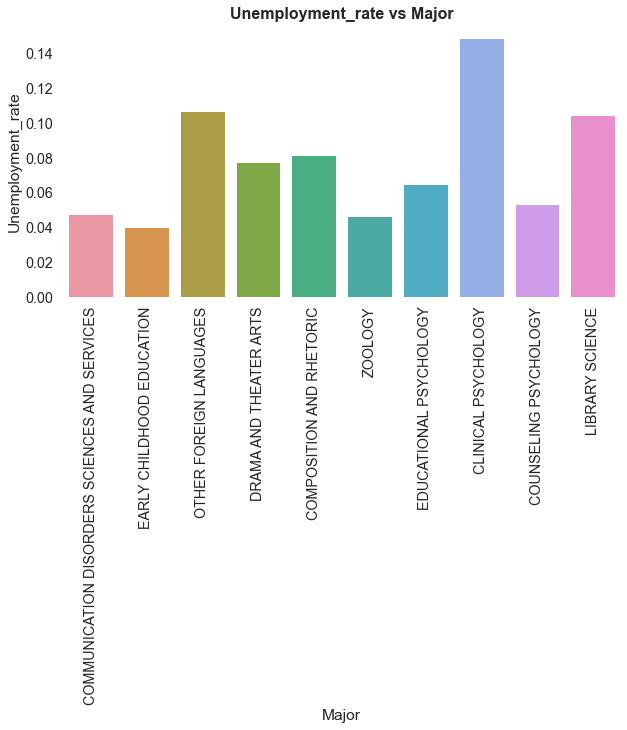

In [31]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
plt.title("Unemployment_rate vs Major", weight='bold').set_fontsize('16')
plt.xlabel('Major')
plt.ylabel('Unemployment_rate')
sns.barplot(x=recent_grads[-10:]['Major'], y=recent_grads[-10:]['Unemployment_rate'], ci=None)
ax.set_xticklabels(recent_grads[-10:]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)

Based on the bar plot, **Unemployment_rate seems to be normally distributed** across all majors.

**This is almost the end of the project, so let's do another reflection on what we have done.**

**In the last 4 sections, we created the following:**
1. **Scatter plots** to visualize potential relationships between the following columns:
    - Sample_size and Median
    - Sample_size and Unemployment_rate
    - Full_time and Median
    - ShareWomen and Unemployment_rate
    - Men and Median
    - Women and Median
    - Total vs Median
    - Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
    
 Based on our scatter plots, we find that:
    - **"Do students in more popular majors make more money?"**
    <br>Answer: No. There is correlation between the popularity of the major, and money.
    - **"Do students that majored in subjects that were majority female make more money?"**
    <br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money. 
    <br>(we deep dived on this by creating a bar plot with 3 bins)
    - **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other


2. **Histograms** to visualize the distributions of the following columns: 
    <br>Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women 
    
    We also did further analysis on Sample_size, Employed, ShareWomen, and Women
      - We answered the question, **"How many majors are predominantly male?"** by creating a bar plot when deep diving on ShareWomen
      
      
3. **Scatter matrix** plots to visually explore potential relationships and distributions of the following:
    - Sample_size and Median
    - Sample_size, Median, and Unemployment_rate
    - Total and Median
    - ShareWomen and Median
    - Full_time and Median
    
   Using scatter matrix plots, we managed to validate our answers in the previous sections.
    

4. **Bar Plots** to compare the percentages of women (ShareWomen), and Unemployment_rate of the first and last ten rows of the `recent_grads` dataframe, with Major on the x-axis

As I said before, we are almost done!
<br>**On the next section, let's have some fun by doing further exploration and analysis!**

# `Oooh this is going to be fun ;D`
---
**In this section, we are going to have fun by visually exploring and analyzing data using many different types of plots. So what are we waiting for?**

**`Use a grouped bar plot to compare the number of men with the number of women in each category of majors.`**

In [32]:
#create a new column that shows the difference between male and female graduates in each major
#we will use this new column to sort the data

recent_grads["delta_graduates"] = recent_grads["Men"] - recent_grads["Women"]

#print
print(recent_grads.groupby(["Major_category"])["delta_graduates"].sum().sort_values())

Major_category
Education                             -352077.0
Health                                -312196.0
Psychology & Social Work              -284777.0
Humanities & Liberal Arts             -167776.0
Communications & Journalism           -128759.0
Arts                                   -88350.0
Biology & Life Science                 -84024.0
Industrial Arts & Consumer Services    -22230.0
Social Science                         -16298.0
Interdisciplinary                       -6662.0
Law & Public Policy                      3151.0
Agriculture & Natural Resources          5094.0
Physical Sciences                        5301.0
Business                                33328.0
Computers & Mathematics                118442.0
Engineering                            279031.0
Name: delta_graduates, dtype: float64


Note: positive values means there are more female, and negative values means there are more male

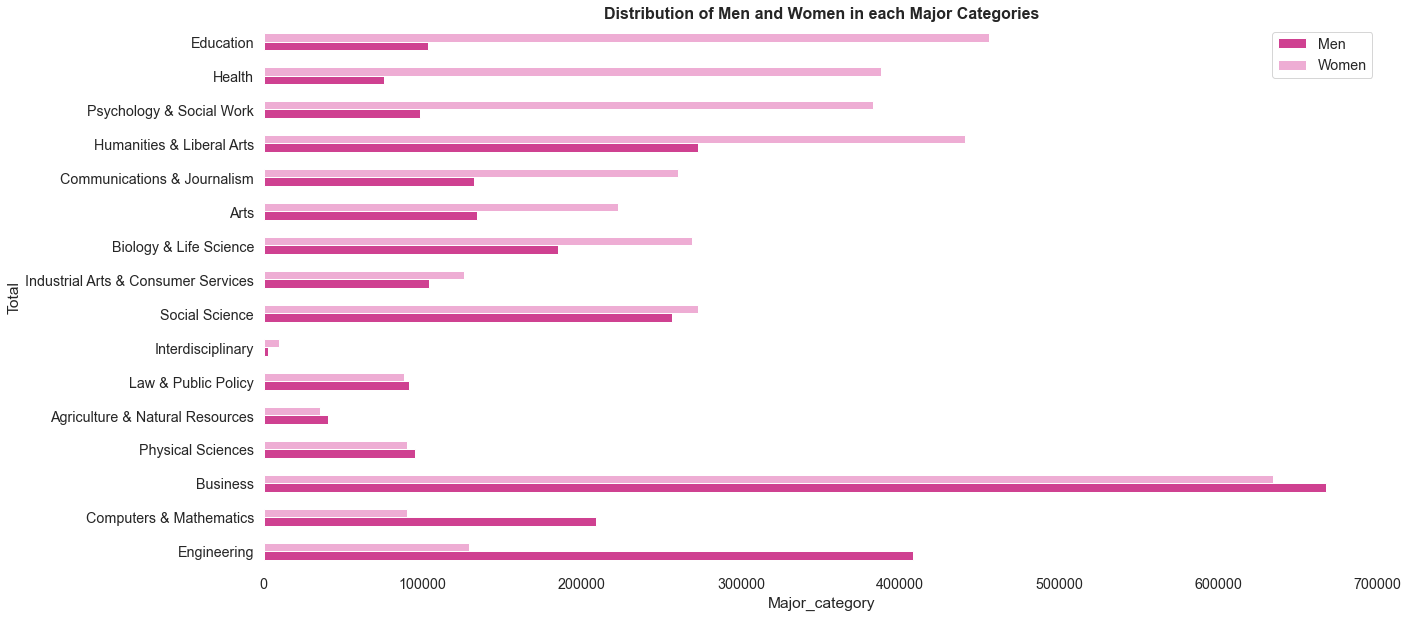

In [33]:
recent_grads.groupby('Major_category').sum().sort_values(by=['delta_graduates'] ,ascending=False).plot.barh(
    y=['Men','Women'], figsize =(20,10))
sns.despine(left=True, bottom=True)
plt.xlabel('Major_category')
plt.ylabel('Total')
plt.title("Distribution of Men and Women in each Major Categories", weight='bold').set_fontsize('16')

Top 3 majors that are predominantly **female: Education, Health, and Psychology & Social Work.** (in order)
<br>Top 3 majors that are predominantly **male:  Engineering, Computers & Mathematics, and Business.** (in order)

**`Use a box plot to explore the distributions of median salaries and unemployment rate.`**

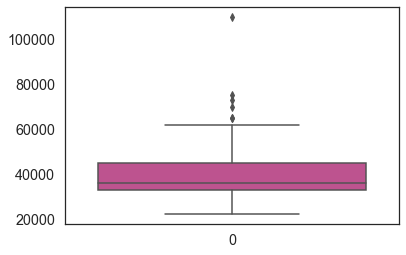

In [34]:
sns.boxplot(data = recent_grads['Median'])

Alright, this verifies our findings in the histogram section, that **median is around \\$30,000 - \\$40,000**

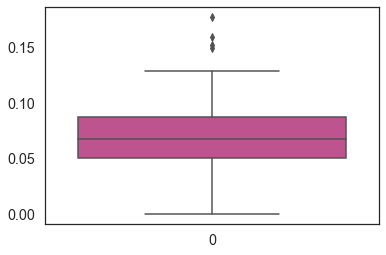

In [35]:
sns.boxplot(data = recent_grads['Unemployment_rate'])

Similarly, this verifies our findings in the histogram section, that **common unemployment rates are between 5.5% - 6.25%**

**`Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project:`**
- `Unemployment_rate vs ShareWomen`
- `Median vs ShareWomen`

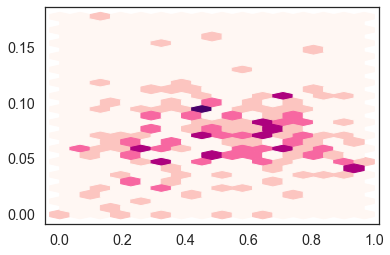

In [36]:
plt.hexbin(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'], gridsize=(15,15), cmap ="RdPu")
plt.show()

Well, another validation, **Unemployment_rate and ShareWomen has no correlation.**

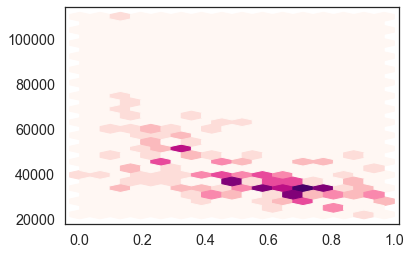

In [37]:
plt.hexbin(recent_grads['ShareWomen'], recent_grads['Median'], gridsize=(15,15), cmap ="RdPu")
plt.show()

Yuuup, **Median and ShareWomen has a weak negative correlation.** Verified!

**`Use a barplot to display the following:`**
- Top 5 majors with the highest 75th percentile of earnings
- Top 5 majors with the most full time employees

Major
PETROLEUM ENGINEERING                                  125000
ASTRONOMY AND ASTROPHYSICS                             109000
METALLURGICAL ENGINEERING                              105000
NUCLEAR ENGINEERING                                    102000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION     90000
Name: P75th, dtype: int64


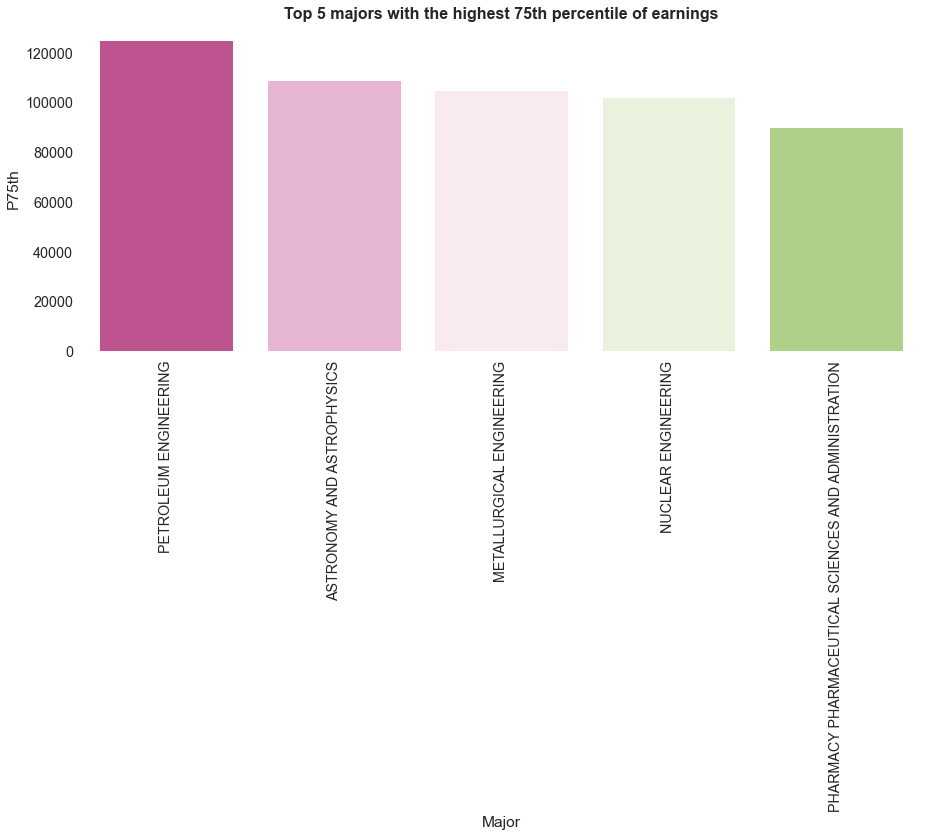

In [38]:
major_highest_P75th = recent_grads.groupby(["Major"])["P75th"].mean().sort_values(ascending=False).head()
print(major_highest_P75th)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title("Top 5 majors with the highest 75th percentile of earnings", weight='bold').set_fontsize('16')
sns.barplot(x=major_highest_P75th.index, y=major_highest_P75th, data=recent_grads, ci=None).set_xticklabels(
                                                                labels=major_highest_P75th.index,rotation='vertical')
sns.despine(left=True, bottom=True)


Well, **for any of you who are still in college and want to get rich, this is the answer.** 
Choose any of these majors:
- PETROLEUM ENGINEERING
- ASTRONOMY AND ASTROPHYSICS
- METALLURGICAL ENGINEERING
- NUCLEAR ENGINEERING
- PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    199897
PSYCHOLOGY                                174438
GENERAL BUSINESS                          138299
MARKETING AND MARKETING RESEARCH          127230
ACCOUNTING                                123169
Name: Full_time_year_round, dtype: int64


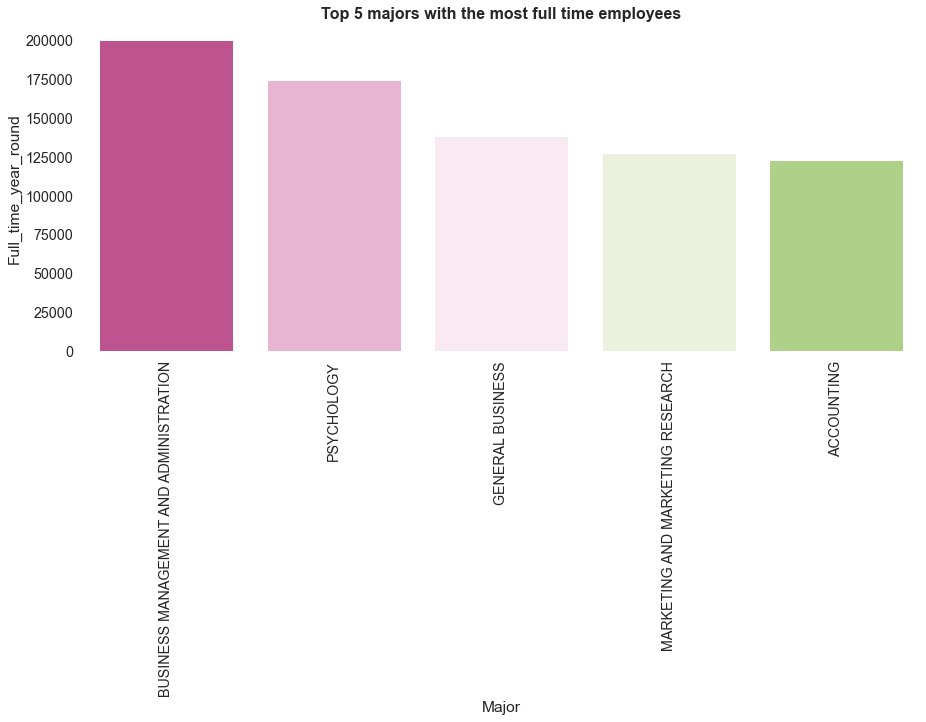

In [39]:
major_most_fulltime = recent_grads.groupby(["Major"])["Full_time_year_round"].mean().sort_values(
                                                                                            ascending=False).head()
print(major_most_fulltime)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title("Top 5 majors with the most full time employees", weight='bold').set_fontsize('16')
sns.barplot(x=major_most_fulltime.index, y=major_most_fulltime, data=recent_grads, ci=None).set_xticklabels(
                                                            labels=major_most_fulltime.index,rotation='vertical')

sns.despine(left=True, bottom=True)

And **for any of you wants to get a full time job easily**, try get into any of these majors:
- BUSINESS MANAGEMENT AND ADMINISTRATION
- PSYCHOLOGY
- GENERAL BUSINESS
- MARKETING AND MARKETING RESEARCH
- ACCOUNTING

1. **Scatter plots** to visualize potential relationships between the following columns:
    - Sample_size and Median
    - Sample_size and Unemployment_rate
    - Full_time and Median
    - ShareWomen and Unemployment_rate
    - Men and Median
    - Women and Median
    - Total vs Median
    - Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
    
 Based on our scatter plots, we find that:
    - **"Do students in more popular majors make more money?"**
    <br>Answer: No. There is correlation between the popularity of the major, and money.
    - **"Do students that majored in subjects that were majority female make more money?"**
    <br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money. 
    <br>(we deep dived on this by creating a bar plot with 3 bins)
    - **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other


2. **Histograms** to visualize the distributions of the following columns: 
    <br>Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women 
    
    We also did further analysis on Sample_size, Employed, ShareWomen, and Women
      - We answered the question, **"How many majors are predominantly male?"** by creating a bar plot when deep diving on ShareWomen
      
      
3. **Scatter matrix** plots to visually explore potential relationships and distributions of the following:
    - Sample_size and Median
    - Sample_size, Median, and Unemployment_rate
    - Total and Median
    - ShareWomen and Median
    - Full_time and Median
    
   Using scatter matrix plots, we managed to validate our answers in the previous sections.
    

4. **Bar Plots** to compare the percentages of women (ShareWomen), and Unemployment_rate of the first and last ten rows of the `recent_grads` dataframe, with Major on the x-axis


5. We did some **fun stuff** here, here are what we did:
    - Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
    - Use a box plot to explore the distributions of median salaries and unemployment rate.
    - Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project:
        - Unemployment_rate vs ShareWomen
        - Median vs ShareWomen
    - Use a barplot to display the following:
        - Top 5 majors with the highest 75th percentile of earnings
        - Top 5 majors with the most full time employees
    
**And that's a wrap!**

# `Conclusion & Insights`
---
---
Well, you know what they say, "All good things must come to an end"

This is the last section of the project. So before we actually end this, 
<br>**Let's present our findings**

**Q&A**
- **"Do students in more popular majors make more money?"**
<br>Answer: No. There is correlation between the popularity of the major, and money
- **"Do students that majored in subjects that were majority female make more money?"**
<br>Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
- **"Is there any link between the number of full-time employees and median salary?"**
<br>Answer: None of them have amy link with each other
- **"How many majors are predominantly male?"**
<br>Answer: 76 majors are predominantly male, and 96 majors are predominantly Female

**Major statistics**
- **Top 3 majors that are predominantly female:** Education, Health, and Psychology & Social Work. (in order)
- **Top 3 majors that are predominantly male:**  Engineering, Computers & Mathematics, and Business. (in order)
- **Top 5 majors with the highest 75th percentile of earnings:**
    - PETROLEUM ENGINEERING
    - ASTRONOMY AND ASTROPHYSICS
    - METALLURGICAL ENGINEERING
    - NUCLEAR ENGINEERING
    - PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION
- **Top 5 majors with the most full time employees:**
    - BUSINESS MANAGEMENT AND ADMINISTRATION
    - PSYCHOLOGY
    - GENERAL BUSINESS
    - MARKETING AND MARKETING RESEARCH
    - ACCOUNTING
    
**Correlation**
- Sample_size and Median = NO
- Sample_size and Unemployment_rate = NO
- Full_time and Median = NO
- ShareWomen and Unemployment_rate = NO
- Men and Median = NO
- Women and Median = NO
- Total vs Median = NO
- **Median vs ShareWomen = Weak negative correlation**

**Extra**

- Students in most majors make around \\$30,000 - \\$40,000 annually.
- Female represent 60% - 70% total number of people per major
- Common unemployment rates are between 5.5% - 6.25%
- Only 1 out of 10 majors with the highest median earnings are predominantly female (ASTRONOMY AND ASTROPHYSICS).
- 10 majors with the lowest median earnings are all predominantly female